<a href="https://colab.research.google.com/github/BaoNguyen151654/Analyzing-Factors-Associated-with-Online-Customer-Purchase-Intention/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
cate_feature = X[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']]
num_feature = X[['BounceRates','ExitRates','PageValues','SpecialDay','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]

In [5]:
cate_feature_list = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
binary_cate_list = ['Weekend']
num_feature_list = ['SpecialDay','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']

In [6]:
X['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [8]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [9]:
X['Month']=le.fit_transform(X['Month'])

/tmp/ipython-input-1256423596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month']=le.fit_transform(X['Month'])


In [10]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
visitor_dummies = ohe.fit_transform(X[['VisitorType']])
visitor_dummies = pd.DataFrame(
    visitor_dummies,
    columns=ohe.get_feature_names_out(['VisitorType']),
    index=X.index
)
X = pd.concat([X.drop(columns=['VisitorType']), visitor_dummies], axis=1)
y = y.astype(int)

In [11]:
model = LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Loop 1

In [13]:
# Assumption 1: The Response Variable is Binary

In [14]:
y.value_counts()

,count
Revenue,
0,10422
1,1908


In [15]:
# Assumption 2: The Observations are Independent

In [16]:
# Assumption 3: There is No Multicollinearity Among Explanatory Variables

In [17]:
corr = X.corr().abs()
high_corr = (
    corr
    .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr[high_corr['Correlation'] > 0.7]
high_corr.sort_values(by='Correlation', ascending=False)

,Variable 1,Variable 2,Correlation
87,BounceRates,ExitRates,0.913004
62,ProductRelated,ProductRelated_Duration,0.860927


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

In [19]:
X_vif = X.copy()
X_vif = X_vif.astype(float)
X_vif = sm.add_constant(X_vif)
vif_df = pd.DataFrame()
vif_df["Variable"] = X_vif.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]
vif_df

,Variable,VIF
0,const,23.674301
1,Administrative,1.944894
2,Administrative_Duration,1.691404
3,Informational,1.832547
4,Informational_Duration,1.678747
5,ProductRelated,4.430363
6,ProductRelated_Duration,4.330691
7,BounceRates,6.410740
8,ExitRates,7.151757
9,PageValues,1.055733


In [20]:
# Assumption 4: There are No Extreme Outliers

In [21]:
Q1 = num_feature.quantile(0.25)
Q3 = num_feature.quantile(0.75)
IQR = Q3 - Q1
outliers = ((num_feature < (Q1 - 1.5*IQR)) | (num_feature > (Q3 + 1.5*IQR)))
print(outliers.sum())

BounceRates                1551
ExitRates                  1099
PageValues                 2730
SpecialDay                 1251
Administrative              404
Administrative_Duration    1172
Informational              2631
Informational_Duration     2405
ProductRelated              987
ProductRelated_Duration     961
dtype: int64


In [22]:
# Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

In [23]:
X_numeric = num_feature.copy()
X_numeric = sm.add_constant(X_numeric)
for col in X_numeric.columns[1:]:
    X_numeric[col + '_log'] = X_numeric[col] * np.log(X_numeric[col] + 1e-5)
model = sm.Logit(y, X_numeric).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.272887
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12309
Method:                           MLE   Df Model:                           20
Date:                Tue, 30 Dec 2025   Pseudo R-squ.:                  0.3666
Time:                        14:36:51   Log-Likelihood:                -3364.7
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.8809      0.156    -18.483      0.000  

In [24]:
# P value > 0.05 means there is a linear relationship
# Administrative_Duration_log, Administrative_log, Informational_log, Informational_Duration_log,  ProductRelated_log are not linear

In [25]:
# Assumption 6: The Sample Size is Sufficiently Large

In [26]:
k = X.shape[1]
p_min = min(y.value_counts(normalize=True))
n_min = (10 * k) / p_min
print(f"Minimum required sample size: {n_min}")
print(f"Actual sample size: {len(y)}")

Minimum required sample size: 1163.2075471698113
Actual sample size: 12330


In [27]:
# loop 2

In [28]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,False,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,False,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,False,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,False,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,True,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,True,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,True,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,True,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,False,0.0,1.0


In [29]:
# Loop 2

In [30]:
X['EngagementIndex'] = 1 - (X['BounceRates'] + X['ExitRates']) / 2

In [31]:
X = X.drop(columns = ['BounceRates','ExitRates','ProductRelated','Administrative_Duration','Administrative','Informational','Informational_Duration'])
X

,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor,EngagementIndex
0,0.000000,0.000000,0.0,2,1,1,1,1,False,0.0,1.0,0.800000
1,64.000000,0.000000,0.0,2,2,2,1,2,False,0.0,1.0,0.950000
2,0.000000,0.000000,0.0,2,4,1,9,3,False,0.0,1.0,0.800000
3,2.666667,0.000000,0.0,2,3,2,2,4,False,0.0,1.0,0.905000
4,627.500000,0.000000,0.0,2,3,3,1,4,True,0.0,1.0,0.965000
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1783.791667,12.241717,0.0,1,4,6,1,1,True,0.0,1.0,0.981913
12326,465.750000,0.000000,0.0,7,3,2,1,8,True,0.0,1.0,0.989333
12327,184.250000,0.000000,0.0,7,3,2,1,13,True,0.0,1.0,0.915000
12328,346.000000,0.000000,0.0,7,2,2,3,11,False,0.0,1.0,0.989474


In [32]:
num_feature = X[['EngagementIndex','PageValues','SpecialDay','ProductRelated_Duration']]
num_feature_list = ['EngagementIndex','PageValues','SpecialDay','ProductRelated_Duration']

In [33]:
for col in num_feature.columns:
    Q1 = num_feature[col].quantile(0.25)
    Q3 = num_feature[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num_feature = num_feature[(num_feature[col] >= lower) & (num_feature[col] <= upper)]

In [34]:
for col in num_feature_list:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X = X[(X[col] >= lower) & (X[col] <= upper)]

In [35]:
# One drawback of removing outliers is that the variables "PageValues" and "SpecialDay" become unusable, as they only contain zeros after filtering. Therefore, I will drop both variables before retraining the model.

In [36]:
print(X[['PageValues','SpecialDay']].describe())
print(X[['PageValues','SpecialDay']].isna().sum())

       PageValues  SpecialDay
count      6851.0      6851.0
mean          0.0         0.0
std           0.0         0.0
min           0.0         0.0
25%           0.0         0.0
50%           0.0         0.0
75%           0.0         0.0
max           0.0         0.0
PageValues    0
SpecialDay    0
dtype: int64


In [37]:
X = X.drop(columns = ['PageValues','SpecialDay'])

In [38]:
num_feature = X[['EngagementIndex','ProductRelated_Duration']]
num_feature_list = ['EngagementIndex','ProductRelated_Duration']

In [39]:
y = y.loc[X.index]
model2= LogisticRegression()
model2.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Assumption 3: There is No Multicollinearity Among Explanatory Variables

In [41]:
corr = X.corr().abs()
high_corr = (
    corr
    .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr[high_corr['Correlation'] > 0.7]
high_corr.sort_values(by='Correlation', ascending=False)

,Variable 1,Variable 2,Correlation


In [42]:
X_vif = X.copy()
X_vif = X_vif.astype(float)
X_vif = sm.add_constant(X_vif)
vif_df = pd.DataFrame()
vif_df["Variable"] = X_vif.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]
vif_df

,Variable,VIF
0,const,4890.770097
1,ProductRelated_Duration,1.081645
2,Month,1.016627
3,OperatingSystems,1.158841
4,Browser,1.148238
5,Region,1.022907
6,TrafficType,1.077766
7,Weekend,1.007259
8,VisitorType_Other,1.300107
9,VisitorType_Returning_Visitor,1.167817


In [43]:
# Assumption 4: There are No Extreme Outliers

In [44]:
outliers = ((num_feature < (Q1 - 1.5*IQR)) | (num_feature > (Q3 + 1.5*IQR)))
print(outliers.sum())

EngagementIndex            0
ProductRelated_Duration    0
dtype: int64


In [45]:
# Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

In [46]:
num_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6851 entries, 1 to 12329
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EngagementIndex          6851 non-null   float64
 1   ProductRelated_Duration  6851 non-null   float64
dtypes: float64(2)
memory usage: 160.6 KB


In [47]:
X_numeric = num_feature.copy()
X_numeric = sm.add_constant(X_numeric)
for col in X_numeric.columns[1:]:
    X_numeric[col + '_log'] = X_numeric[col] * np.log(X_numeric[col] + 1e-5)
model = sm.Logit(y, X_numeric).fit()
print(model.summary())

         Current function value: 0.169538
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 6851
Model:                          Logit   Df Residuals:                     6846
Method:                           MLE   Df Model:                            4
Date:                Tue, 30 Dec 2025   Pseudo R-squ.:                 0.01999
Time:                        14:36:53   Log-Likelihood:                -1161.5
converged:                      False   LL-Null:                       -1185.2
Covariance Type:            nonrobust   LLR p-value:                 1.274e-09
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1718.1882    571.672     -3.006      0.003   -2838.646    -597.731
EngagementInde

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
# Assumption 6: The Sample Size is Sufficiently Large

In [49]:
k = X.shape[1]
p_min = min(y.value_counts(normalize=True))
n_min = (10 * k) / p_min
print(f"Minimum required sample size: {n_min}")
print(f"Actual sample size: {len(y)}")

Minimum required sample size: 2403.859649122807
Actual sample size: 6851


In [50]:
print("K: ", k)
print('p_min: ', p_min)
print('n_min: ', n_min)

K:  10
p_min:  0.04159976645745147
n_min:  2403.859649122807


In [51]:
X['Weekend'] = X['Weekend'].astype(int)

In [52]:
X = sm.add_constant(X)
model = sm.Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.166619
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 6851
Model:                          Logit   Df Residuals:                     6840
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Dec 2025   Pseudo R-squ.:                 0.03686
Time:                        14:36:53   Log-Likelihood:                -1141.5
converged:                       True   LL-Null:                       -1185.2
Covariance Type:            nonrobust   LLR p-value:                 1.781e-14
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.6050      4.550     -0.133      0.

In [53]:
# Based on the results above, ProductRelated_Duration, Month, and VisitorType_Returning_Visitor are statistically significant, and their relationships with the target variable y can be interpreted using this model.

In [54]:
ame = model.get_margeff(at='overall')
print(ame.summary())

        Logit Marginal Effects       
Dep. Variable:                Revenue
Method:                          dydx
At:                           overall
                                   dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ProductRelated_Duration          1.8e-05   3.41e-06      5.279      0.000    1.13e-05    2.47e-05
Month                             0.0047      0.001      4.338      0.000       0.003       0.007
OperatingSystems                 -0.0054      0.003     -1.820      0.069      -0.011       0.000
Browser                           0.0004      0.001      0.283      0.777      -0.002       0.003
Region                           -0.0010      0.001     -0.956      0.339      -0.003       0.001
TrafficType                       0.0006      0.001      0.881      0.379      -0.001       0.002
Weekend                           0.0066      0.005      1.238  

In [55]:
coefs = {
    'ProductRelated_Duration': 0.0005,
    'Month': 0.1198,
    'VisitorType_Returning_Visitor': -0.9148
}
for var, c in coefs.items():
    or_val = np.exp(c)
    print(f"{var}: Odds Ratio = {or_val:.3f}")

ProductRelated_Duration: Odds Ratio = 1.001
Month: Odds Ratio = 1.127
VisitorType_Returning_Visitor: Odds Ratio = 0.401


In [56]:
for var, c in coefs.items():
    or_val = np.exp(c)
    pct_change = (or_val - 1) * 100
    print(f"{var}: Odds Ratio = {or_val:.3f}, Change in odds = {pct_change:.1f}%")

ProductRelated_Duration: Odds Ratio = 1.001, Change in odds = 0.1%
Month: Odds Ratio = 1.127, Change in odds = 12.7%
VisitorType_Returning_Visitor: Odds Ratio = 0.401, Change in odds = -59.9%


In [57]:
log_odds = model.predict(X, linear=True)

/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


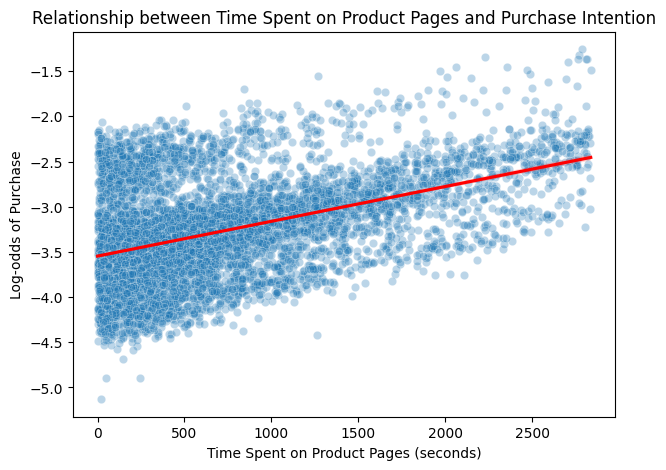

In [58]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X['ProductRelated_Duration'],
    y=log_odds,
    alpha=0.3
)
sns.regplot(
    x=X['ProductRelated_Duration'],
    y=log_odds,
    scatter=False,
    color='red'
)

plt.xlabel("Time Spent on Product Pages (seconds)")
plt.ylabel("Log-odds of Purchase")
plt.title("Relationship between Time Spent on Product Pages and Purchase Intention")
plt.show()